In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import pickle

In [ ]:
car_prediction = pd.read_csv("/content/car_prediction_data.csv")
car_prediction


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
car_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_prediction.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_prediction.isnull().sum()


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
car_prediction.dtypes


,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Kms_Driven,int64
Fuel_Type,object
Seller_Type,object
Transmission,object
Owner,int64


In [ ]:
car_prediction.duplicated().sum()

np.int64(2)

In [ ]:
car_prediction[car_prediction.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [ ]:
car_prediction = car_prediction.drop_duplicates()

In [ ]:
car_prediction.duplicated().sum()

np.int64(0)

identify num cols

In [ ]:
num_cols = car_prediction.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

encoding


In [ ]:
car_prediction = car_prediction.drop(['Car_Name'], axis=1)

In [ ]:
column=['Fuel_Type','Seller_Type','Transmission']
car_prediction = pd.get_dummies(car_prediction, columns=column, drop_first=True, dtype=int)

In [ ]:
car_prediction

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,1,0,1
298,2009,3.35,11.00,87934,0,0,1,0,1
299,2017,11.50,12.50,9000,0,1,0,0,1


scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(car_prediction[['Present_Price','Kms_Driven','Year']])


outlier

In [ ]:
outlier = {}

for col in num_cols:
    Q1 = car_prediction[col].quantile(0.25)
    Q3 = car_prediction[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = car_prediction[(car_prediction[col] < lower) | (car_prediction[col] > upper)]
    outlier[col] = outliers.shape[0]

outlier

{'Year': 7,
 'Selling_Price': 16,
 'Present_Price': 14,
 'Kms_Driven': 8,
 'Owner': 11}

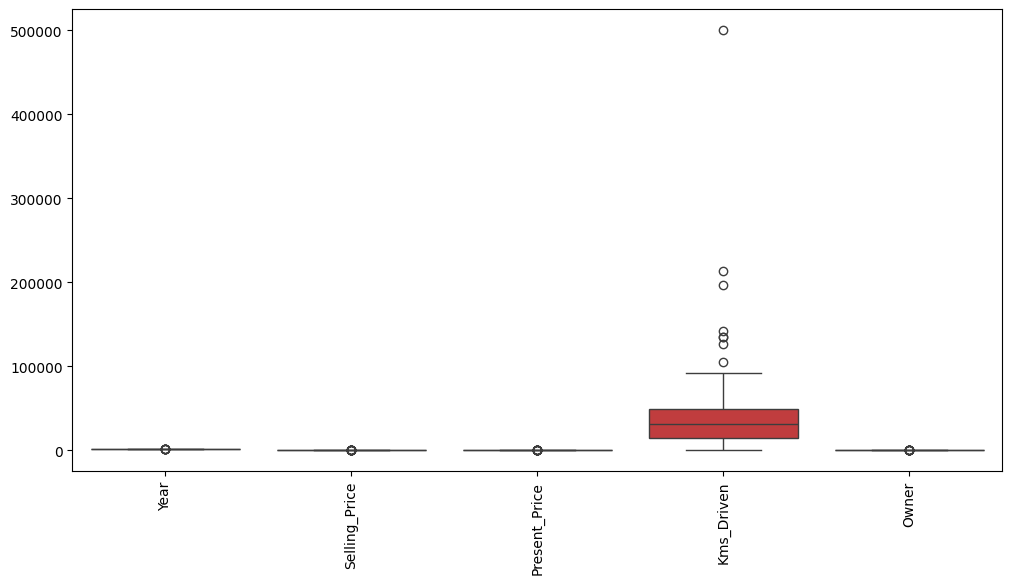

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=car_prediction[num_cols])
plt.xticks(rotation=90)
plt.show()

In [ ]:
for col in num_cols:
    Q1 = car_prediction[col].quantile(0.25)
    Q3 = car_prediction[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    car_prediction[col] = car_prediction[col].clip(lower, upper)


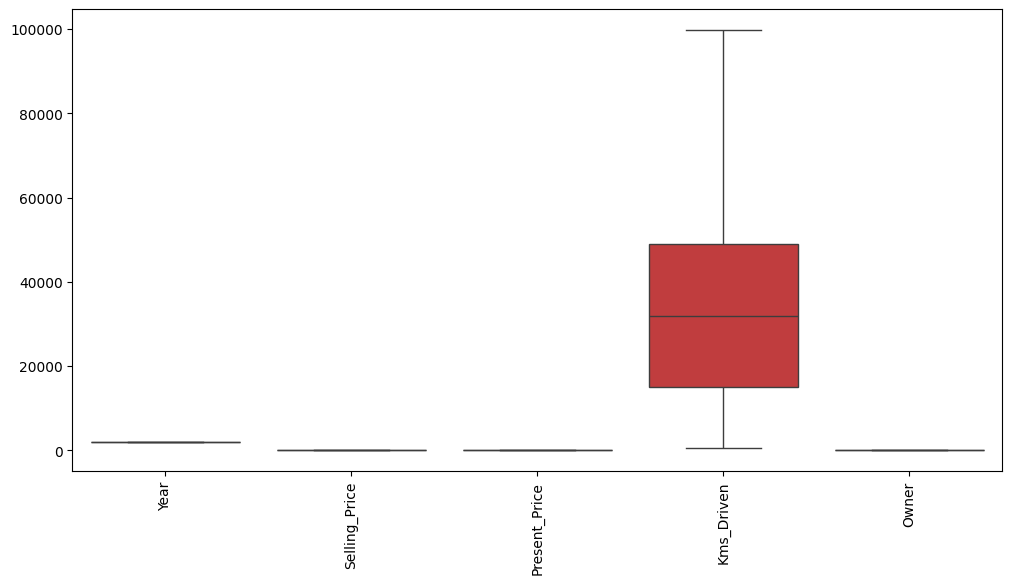

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=car_prediction[num_cols])
plt.xticks(rotation=90)
plt.show()

feature engineering


In [ ]:
car_prediction['Car_Age'] = 2026 - car_prediction['Year']
car_prediction['Price_Diff'] = car_prediction['Present_Price'] - car_prediction['Selling_Price']

In [ ]:
car_prediction

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Car_Age,Price_Diff
0,2014,3.35,5.59,27000.0,0,0,1,0,1,12,2.24
1,2013,4.75,9.54,43000.0,0,1,0,0,1,13,4.79
2,2017,7.25,9.85,6900.0,0,0,1,0,1,9,2.60
3,2011,2.85,4.15,5200.0,0,0,1,0,1,15,1.30
4,2014,4.60,6.87,42450.0,0,1,0,0,1,12,2.27
...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988.0,0,1,0,0,1,10,2.10
297,2015,4.00,5.90,60000.0,0,0,1,0,1,11,1.90
298,2009,3.35,11.00,87934.0,0,0,1,0,1,17,7.65
299,2017,11.50,12.50,9000.0,0,1,0,0,1,9,1.00


In [ ]:
#To keep only important features that influence Selling_Price and remove useless ones before building the model.
corr = car_prediction.select_dtypes(include=['number']).corr()['Selling_Price'].abs()

features = corr[corr > 0.1].index

# Separate features and target
X = car_prediction[['Car_Age','Year','Present_Price','Kms_Driven']]
y = car_prediction['Selling_Price']
features

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'Car_Age', 'Price_Diff'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
train_columns = X_train.columns

In [ ]:
X_train.shape

(239, 4)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred =model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 1.4767713642534588
MSE: 5.049453714635459
RMSE: 2.247098955238834
R2 Score: 0.6293631023181612


In [ ]:
model.coef_

array([-1.75728567e-01,  1.75728567e-01,  5.78711049e-01, -2.83387904e-06])

In [ ]:
model.intercept_

np.float64(-351.33534035165155)

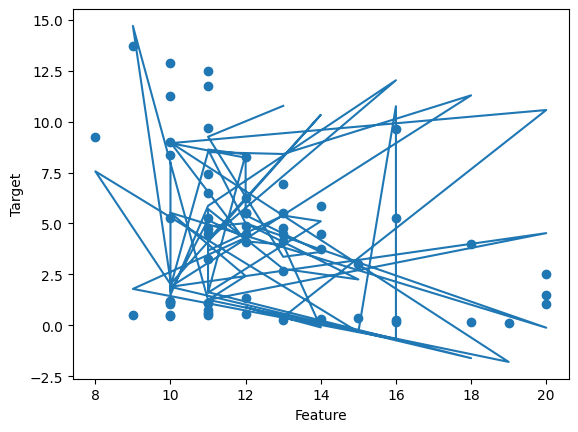

In [ ]:
plt.scatter(X_test.iloc[:, 0], y_test)
plt.plot(X_test.iloc[:, 0], y_pred)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

In [ ]:
with open("car_model.pkl", "wb") as file:
    pickle.dump(model, file)